# 3. Explorative Data Analyses

Most important findings on the course dataset:
- there are courses with no reviews/ratings, but most of them are between rating 4 and 4.5
- The price ranges between 0 and 199 EUR
- There are some really popular courses with a lot of subscribers. The top 3 are:
        - machinelearning	with more than 300T subscribers
        - python-for-data-science-and-machine-learning-bootcamp with 192T subscribers
        - an-entire-mba-in-1-courseaward-winning-business-school-prof with 187T subscribers
- Most courses don't have any quizzes or practice tests
- The number of lectures mostly vary between 13 and 37 (IQR)
- The average age of a course is 26 months (since it was published). There are more recently published courses than older ones.
- The majority of the courses is for all levels. Only a few courses requires an advanced level.
- The courses are divided into 16 subcategories, whereas the two most significant are Finance and Entrepreneurship. 
        - Two subcategories have an average price higher than 100 dollars : The subcategory Data & analytics with 112, and Project Management with 104
        - The total earning on the courses is the highest in the subcategory for Data & Analytics and the second is in Entrepreneurship.
        - The total number of subscribers are the highest in the category of Entrepreneurship (1.) and in Data & Analytics (2.)
        - There is not much difference between the average ratings of the courses in each subcategory. The highest average ratings are in the subcategories Media and Communications. 
- I investigated the top words in each subcategories in the attributes objectives and description separately. E.g. in the subcategory Data& Analytics, the top 5 words are:
    - data, use, model, understand, create

After the univariate analysis I also executed multivariate analysis:
- There is a positive correlation between the number of reviews/number of subscribers and the average rating - students normally give good ratings for courses they liked
- As expected, there is a positive correlation between number of subscribers and number of reviews
- There is also a positive correlation between published since and the average rating -> older courses have better ratings. This seems logic, since I would expect that courses which aren't popular won't stay long on the sortiment
- The price doesn't have an effect on the average ratings or on the number of subsribers

Most important findings on the reviews dataset: 
- The users are unfortunately not unique. Because if this reason, it is not possible to build a recommender system on the user ratings. 
- - Most users (more than 600.000) gave only one review, but there are couple user_names, who have plenty of reviews: the most common username is David with more than 400 reviews.
- Most courses have very few reviews



In [1]:
import pandas as pd

# Test pandas functionality
df = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6]})
print(df)


   A  B
0  1  4
1  2  5
2  3  6


In [2]:
import pandas as pd
import numpy as np
import ast
import scipy.stats as st
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
import udemy_functions
#for the text attributes
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
from operator import itemgetter
from nltk.stem import SnowballStemmer

## 3.1. EDA of the course dataset

In [3]:
df_courses=pd.read_csv('data/cleaned/cleaned/df_courses.csv', index_col=0, sep=' ', converters={"objectives": ast.literal_eval})
df_courses.tail()

,avg_rating,avg_rating_recent,description_text,has_certificate,is_paid,id,instructional_level,is_enrollable_on_mobile,is_owned_by_instructor_team,is_practice_test_course,...,published_title,relevancy_score,rating_1,rating_2,rating_3,rating_4,rating_5,published_since_month,primary_category,primary_subcategory
9995,4.25,4.445778,An Advanced Java Tutorial aimed towards the ...,True,True,28373,Intermediate Level,False,False,False,...,advanced-java-programming,NaN,0.033,0.050,0.171,0.368,0.377,2012-11-02 00:54:02+00:00,Development,Programming Languages
9996,4.05,3.905764,*** Enroll Now And Learn How To Create Your Ow...,True,True,581854,Intermediate Level,False,False,False,...,create-a-2d-platformer-game-with-unity,NaN,0.039,0.033,0.081,0.284,0.563,2015-08-14 22:52:04+00:00,Development,Game Development
9997,4.00,4.039895,Selenium is the most popular web browser autom...,True,True,581036,Beginner Level,False,False,False,...,learn-web-automation-testing-using-selenium,NaN,0.062,0.099,0.296,0.309,0.235,2015-09-15 20:39:07+00:00,Development,Software Testing
9998,3.10,3.276203,"Introduction: Welcome to ""Java: The Complete ...",True,True,590774,Beginner Level,False,False,False,...,dotrootjava,NaN,0.091,0.091,0.000,0.500,0.318,2016-01-21 21:22:16+00:00,Development,Programming Languages
9999,4.25,4.527302,If the new Apple TV and the Apple TV App Store...,True,True,611936,Beginner Level,False,False,False,...,apple-tv,NaN,0.014,0.014,0.078,0.171,0.723,2015-10-19 19:51:21+00:00,Development,Mobile Development


### 3.1.3. Numerical columns

In [4]:
df_courses.describe()

,avg_rating,avg_rating_recent,id,num_article_assets,num_curriculum_items,num_lectures,num_practice_tests,num_quizzes,num_subscribers,num_reviews,price,relevancy_score,rating_1,rating_2,rating_3,rating_4,rating_5
count,8102.000000,8102.000000,8.102000e+03,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8.102000e+03,8102.000000,8102.000000,0.0,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000
mean,4.009253,3.986759,2.230176e+06,3.277833,57.782646,55.880153,0.065046,1.682671,1.045510e+04,672.070600,279.803634,NaN,0.045163,0.045842,0.141461,0.283750,0.441793
std,0.982072,0.991455,1.261204e+06,11.593267,72.192808,70.226535,0.473299,7.278432,3.807506e+04,4247.699979,278.879443,NaN,0.088644,0.073729,0.117613,0.146901,0.207098
min,0.000000,0.000000,8.324000e+03,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.850000,3.818241,1.180175e+06,0.000000,19.000000,18.000000,0.000000,0.000000,2.140000e+02,14.000000,1.000000,NaN,0.000000,0.000000,0.069000,0.217000,0.333000
50%,4.272728,4.255932,2.131223e+06,0.000000,35.000000,34.000000,0.000000,0.000000,1.651000e+03,53.000000,229.990000,NaN,0.017000,0.026000,0.130000,0.306000,0.449000
75%,4.529614,4.534018,3.365224e+06,2.000000,68.000000,66.000000,0.000000,1.000000,8.071500e+03,227.000000,519.990000,NaN,0.050000,0.059000,0.195000,0.364000,0.558000
max,5.000000,5.000000,4.456766e+06,249.000000,808.000000,806.000000,6.000000,250.000000,1.662635e+06,153862.000000,999.990000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000


There are around 900 courses with no reviews/ratings, but most of the ratings are between rating 4 and 4.5.

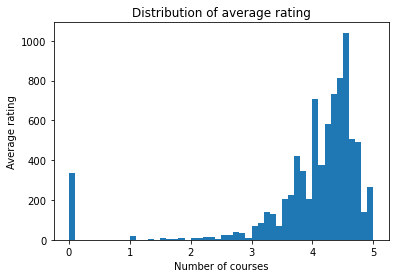

In [5]:
plt.hist(df_courses['avg_rating'], bins=50)
plt.xlabel('Number of courses')
plt.ylabel('Average rating')
plt.title('Distribution of average rating')
plt.savefig('images/avg_rating.png')

The price ranges between 0 and 199 EUR. Most courses cost eiter 19.99 or 199.99 $.

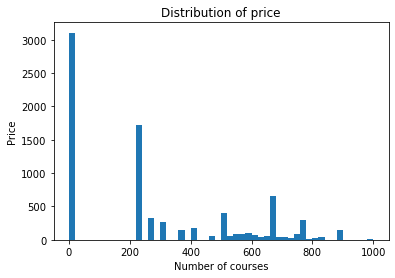

In [6]:
plt.hist(df_courses['price'], bins=50)
plt.xlabel('Number of courses')
plt.ylabel('Price')
plt.title('Distribution of price')
plt.savefig('images/price.png')

I checked which courses are most visited. The most popular course is Machinelearning with more than 300.000 subscribers. Courses with the top 10 most subscribers can be seen below:

In [7]:
#most popular courses
top10_courses= df_courses.sort_values('num_subscribers', ascending=False)[['published_title', 'num_subscribers']].head(10)
for i, row in top10_courses.iterrows():
    print('The course {} has {} subscribers.'.format(row['published_title'],row['num_subscribers']))

The course java-tutorial has 1662635 subscribers.
The course automate has 1014466 subscribers.
The course machinelearning has 836304 subscribers.
The course pythonforbeginnersintro has 684240 subscribers.
The course java-the-complete-java-developer-course has 637796 subscribers.
The course become-an-android-developer-from-scratch has 576638 subscribers.
The course free-learn-c-tutorial-beginners has 547145 subscribers.
The course web-design-secrets has 520935 subscribers.
The course java-programming-complete-beginner-to-advanced has 493855 subscribers.
The course html-and-css-for-beginners-crash-course-learn-fast-easy has 356909 subscribers.


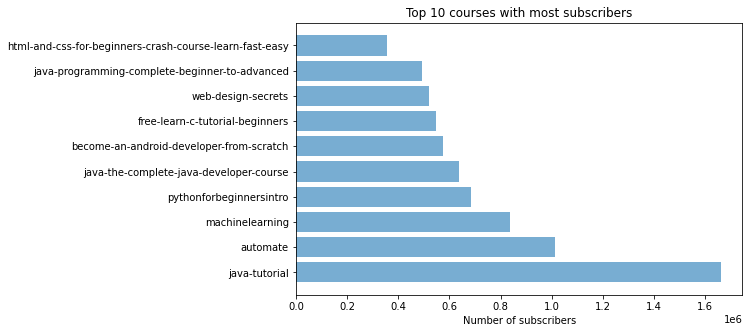

In [8]:
fig, ax= plt.subplots(figsize=(8,5))
ax.barh(np.arange(len(top10_courses)), top10_courses['num_subscribers'], alpha=0.6)
plt.yticks(np.arange(len(top10_courses)), top10_courses['published_title'])
plt.title('Top 10 courses with most subscribers')
ax.set_xlabel('Number of subscribers')
plt.savefig('images/top10courses.png')

I plotted a histogram and a boxplot from each numerical attribute. Some of the features has outliers, and the distribution is skewed.

In [9]:
df_courses['published_since_month']

0       2015-04-13 18:29:47+00:00
1       2015-03-02 01:23:00+00:00
2       2012-09-30 20:11:57+00:00
3       2014-10-11 21:33:45+00:00
4       2020-05-06 21:10:30+00:00
                  ...            
9995    2012-11-02 00:54:02+00:00
9996    2015-08-14 22:52:04+00:00
9997    2015-09-15 20:39:07+00:00
9998    2016-01-21 21:22:16+00:00
9999    2015-10-19 19:51:21+00:00
Name: published_since_month, Length: 8102, dtype: object

Number of 0 values of attribute avg_rating is 335.
Number of 0 values of attribute avg_rating_recent is 335.
Number of 0 values of attribute num_article_assets is 4292.
Number of 0 values of attribute num_curriculum_items is 0.
Number of 0 values of attribute num_lectures is 88.
Number of 0 values of attribute num_practice_tests is 7882.
Number of 0 values of attribute num_quizzes is 6071.
Number of 0 values of attribute num_subscribers is 86.
Number of 0 values of attribute num_reviews is 335.
Number of 0 values of attribute price is 1327.
Number of 0 values of attribute rating_1 is 2625.
Number of 0 values of attribute rating_2 is 2369.
Number of 0 values of attribute rating_3 is 1244.
Number of 0 values of attribute rating_4 is 850.
Number of 0 values of attribute rating_5 is 581.


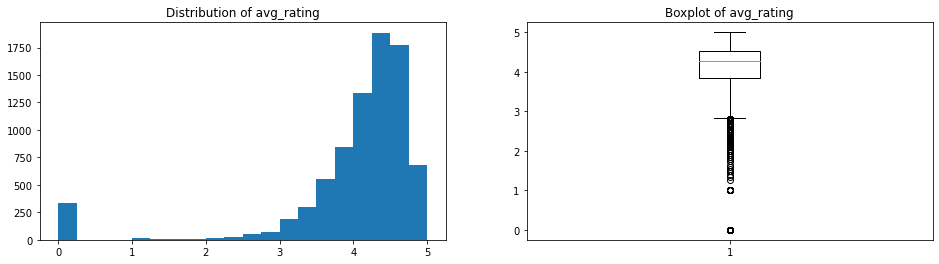

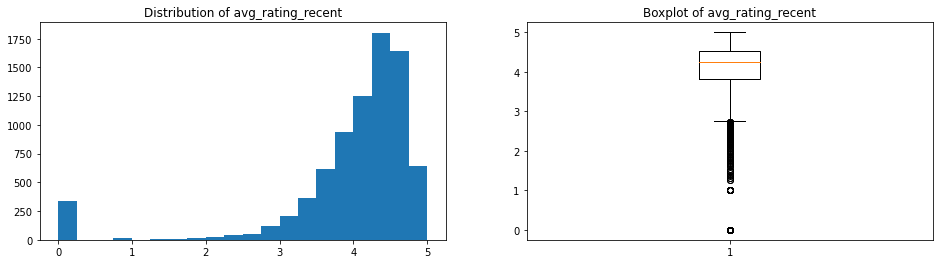

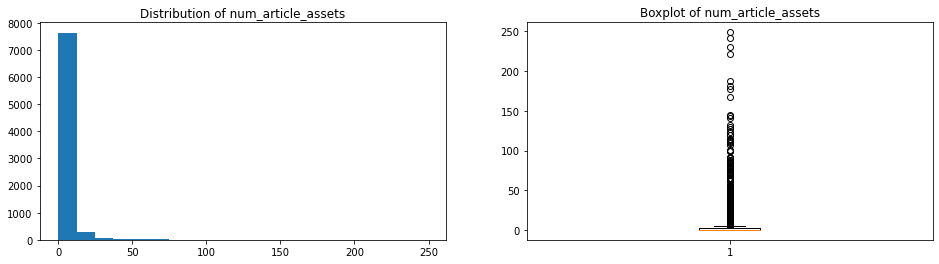

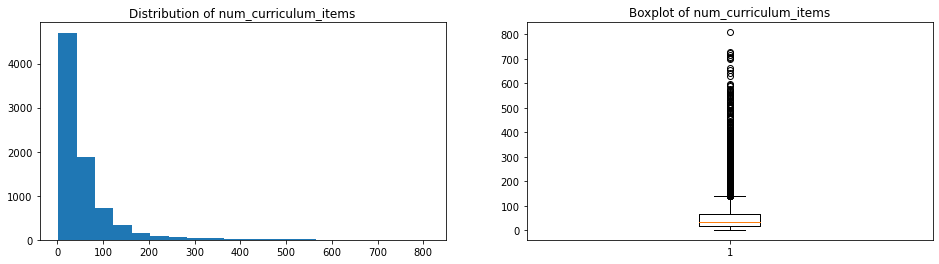

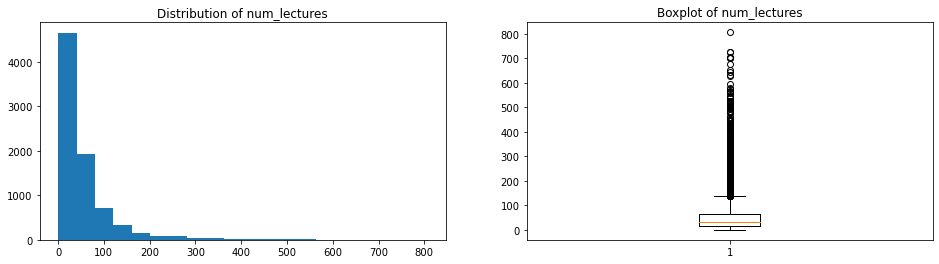

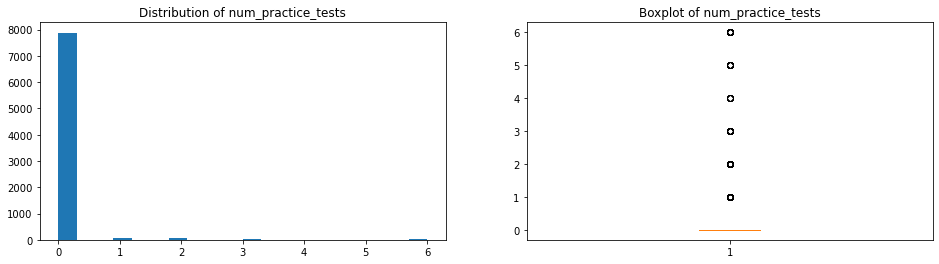

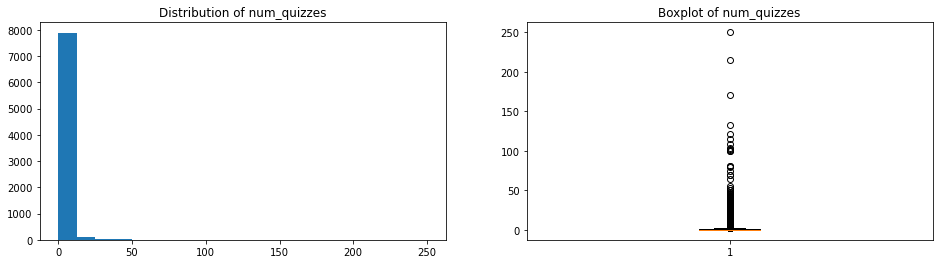

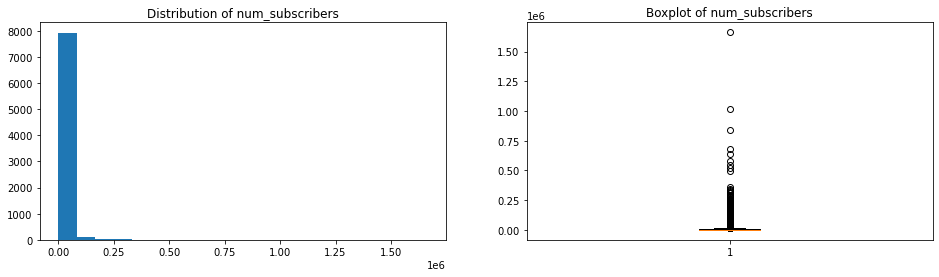

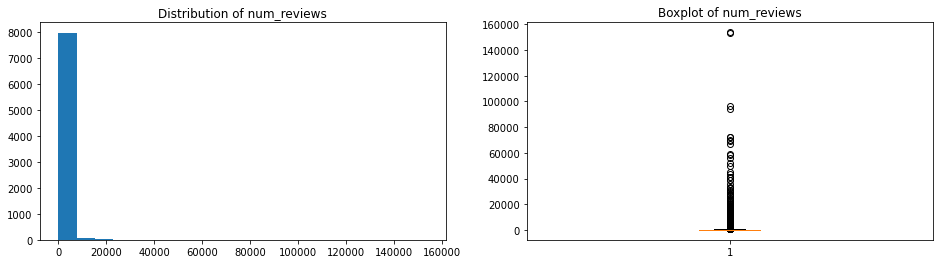

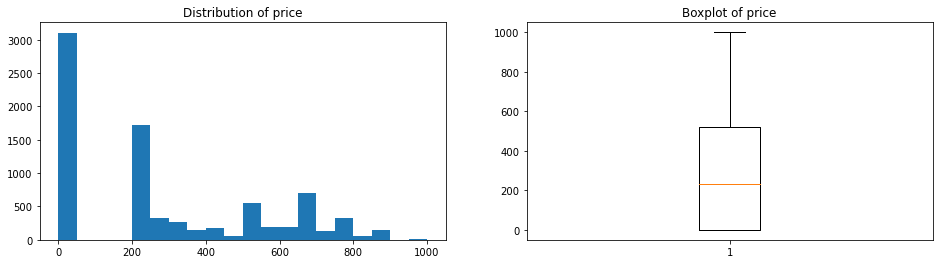

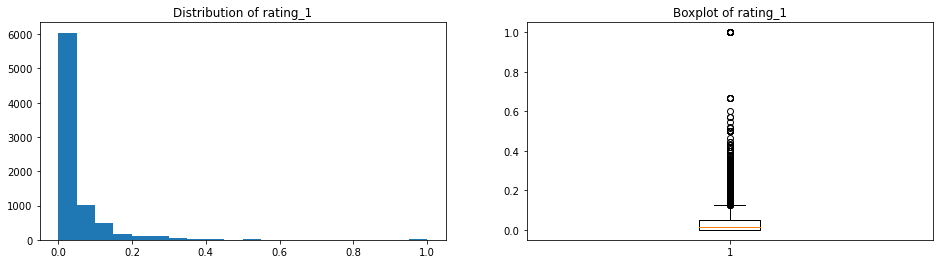

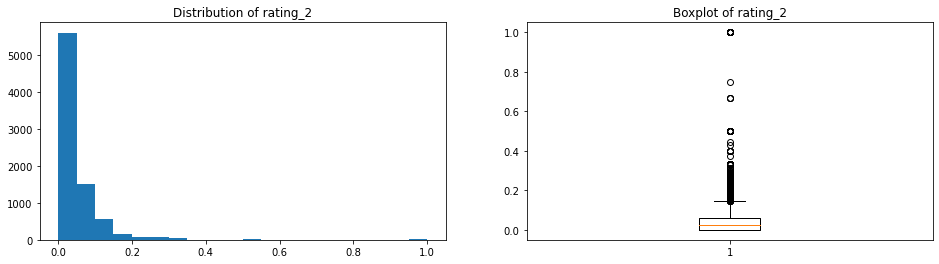

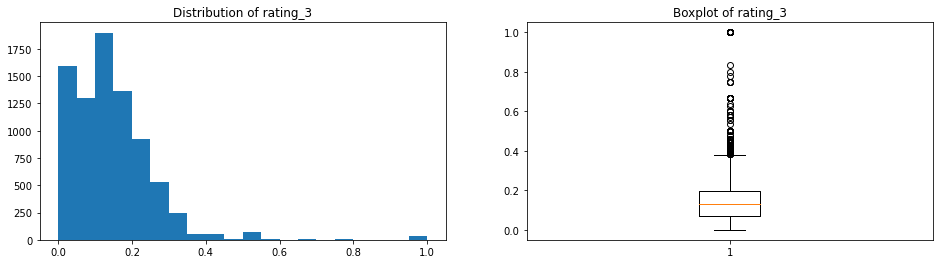

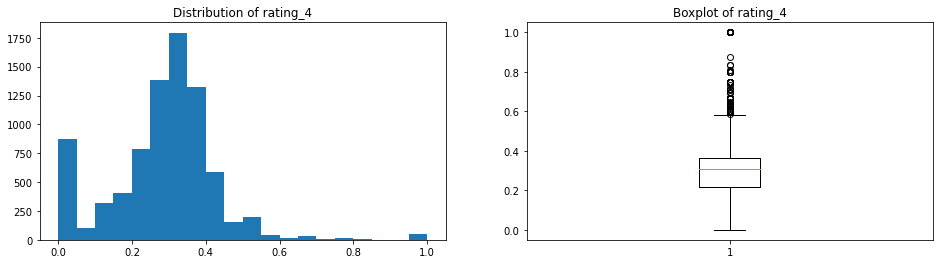

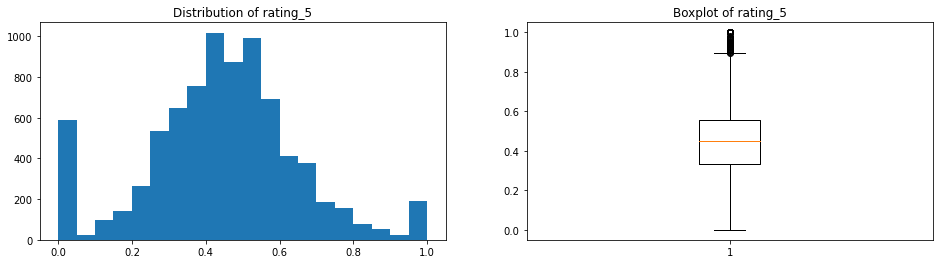

In [10]:
var_num=['avg_rating', 'avg_rating_recent','num_article_assets' , 'num_curriculum_items',
         'num_lectures', 'num_practice_tests', 'num_quizzes','num_subscribers', 'num_reviews', 'price', 
         'rating_1', 'rating_2', 'rating_3', 'rating_4', 'rating_5']

for col in var_num:
    fig, ax= plt.subplots(1,2,figsize=(16,4))
    ax[0].hist(df_courses[col], bins=20)
    ax[1].boxplot(df_courses[col])
    ax[0].set_title('Distribution of '+ str(col))
    ax[1].set_title('Boxplot of '+ str(col))
    print('Number of 0 values of attribute {} is {}.'.format(col, len(df_courses[df_courses[col]==0])))

I defined all data points, whose distance from the mean is more than 3*standard deviation, as outliers. I checked the distribution without these outliers. I didn't excluded these outliers from the data, I only excluded them to have a better understanding of the distribution of the features.

Number of dropped values of attribute avg_rating is 352.
Number of dropped values of attribute avg_rating_recent is 352.
Number of dropped values of attribute num_article_assets is 114.
Number of dropped values of attribute num_curriculum_items is 185.
Number of dropped values of attribute num_lectures is 181.
Number of dropped values of attribute num_practice_tests is 142.
Number of dropped values of attribute num_quizzes is 93.
Number of dropped values of attribute num_subscribers is 103.
Number of dropped values of attribute num_reviews is 69.
Number of dropped values of attribute price is 0.


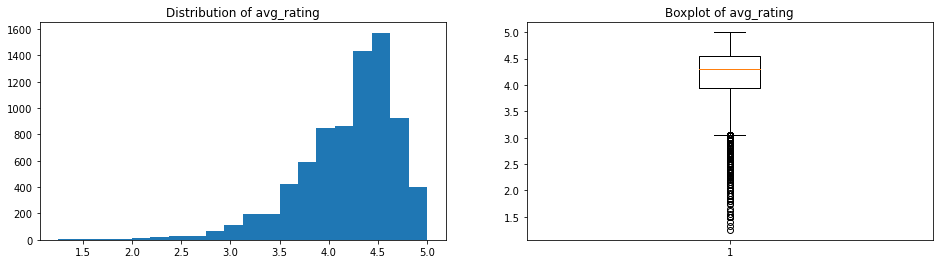

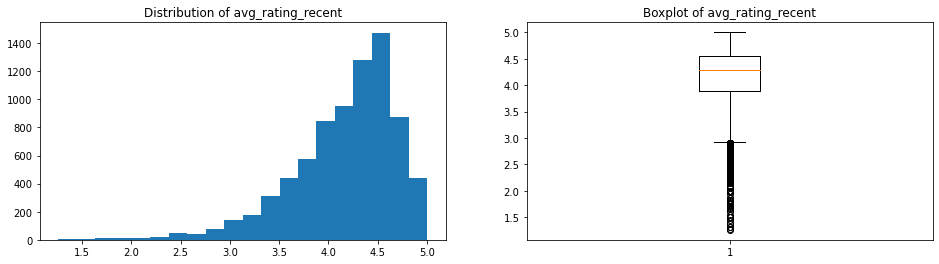

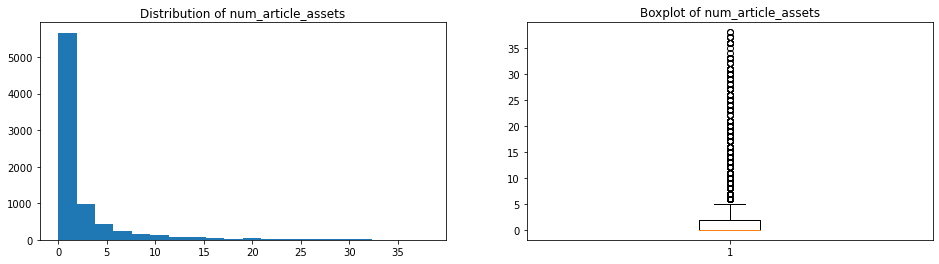

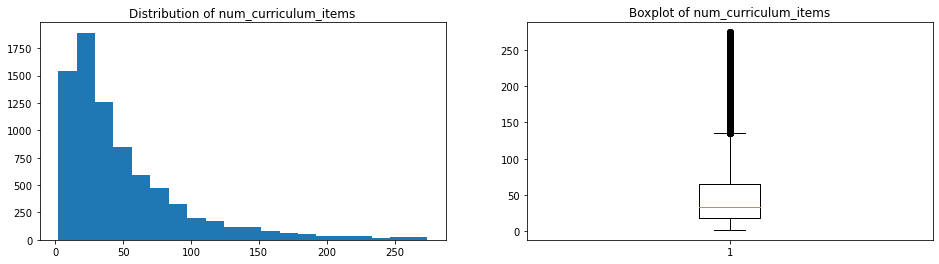

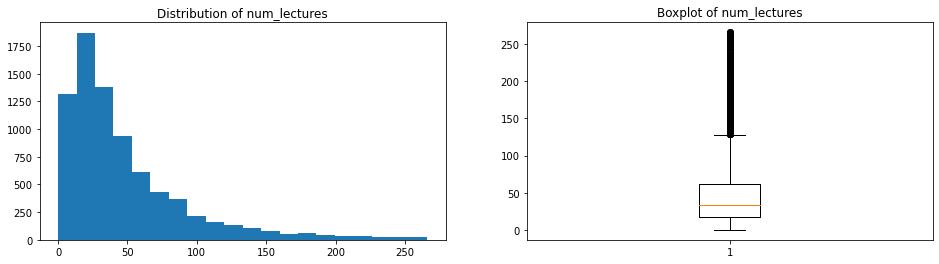

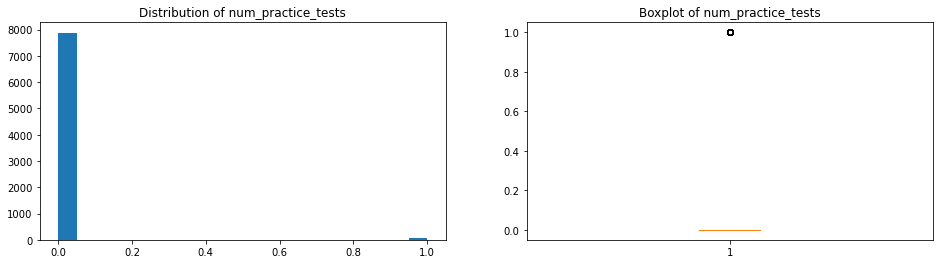

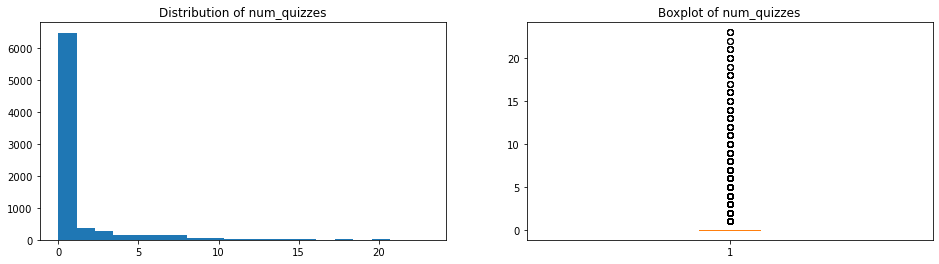

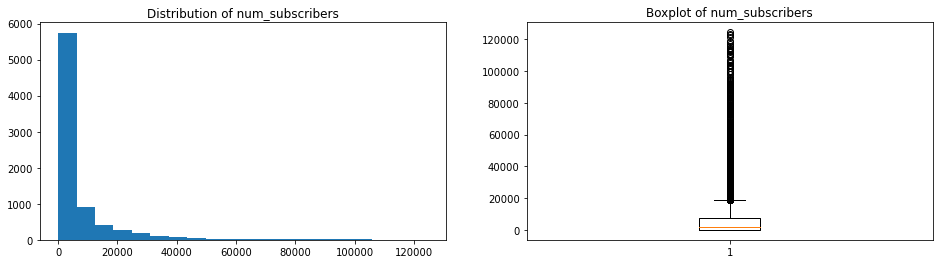

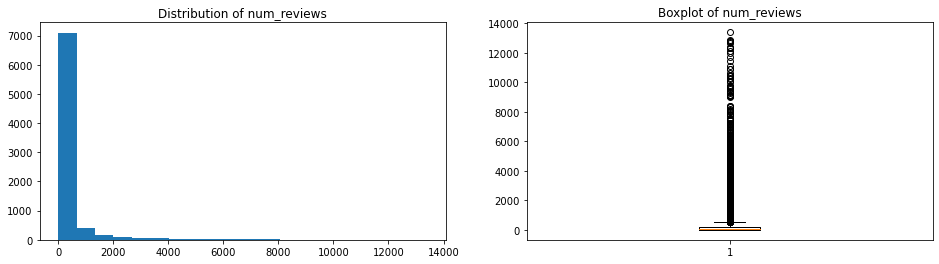

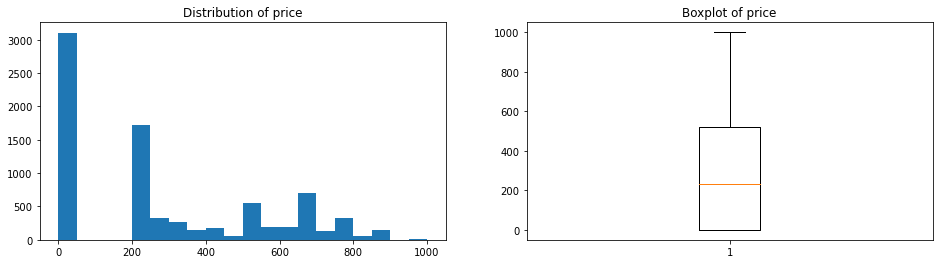

In [11]:
#There are some outliers in the dataset - I filtered out the data, where the value was smaller/larger then mean+-3*std
var_num=['avg_rating', 'avg_rating_recent','num_article_assets' , 'num_curriculum_items','num_lectures', 
         'num_practice_tests', 'num_quizzes','num_subscribers', 'num_reviews', 'price']
excluded_all=[]

for col in var_num:
    mean=df_courses[col].mean()
    std=df_courses[col].std()
    temp=df_courses[(df_courses[col]>mean-3*std) & (df_courses[col]<mean+3*std)]
    excluded_all.extend(list(set(df_courses.index)-set(temp.index)))
    fig, ax= plt.subplots(1,2,figsize=(16,4))
    ax[0].hist(temp[col], bins=20)
    ax[1].boxplot(temp[col])
    ax[0].set_title('Distribution of '+ str(col))
    ax[1].set_title('Boxplot of '+ str(col))
    print('Number of dropped values of attribute {} is {}.'.format(col, len(df_courses)-len(temp)))
excluded=set(excluded_all)

<AxesSubplot:>

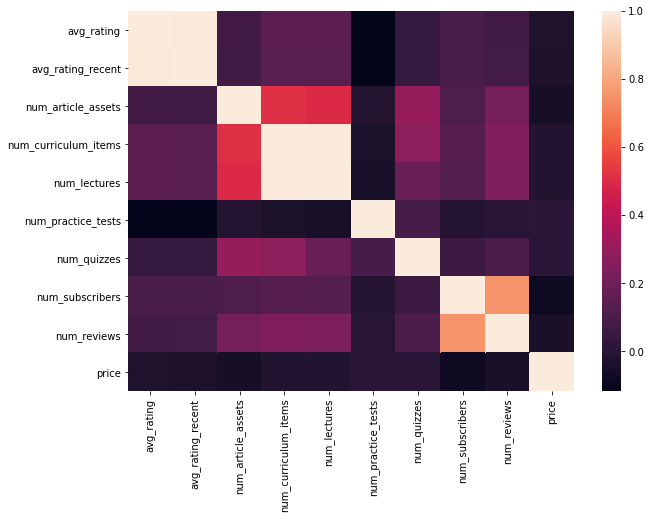

In [12]:
corr = df_courses[var_num].corr()
fig, ax=plt.subplots(figsize=(10,7))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

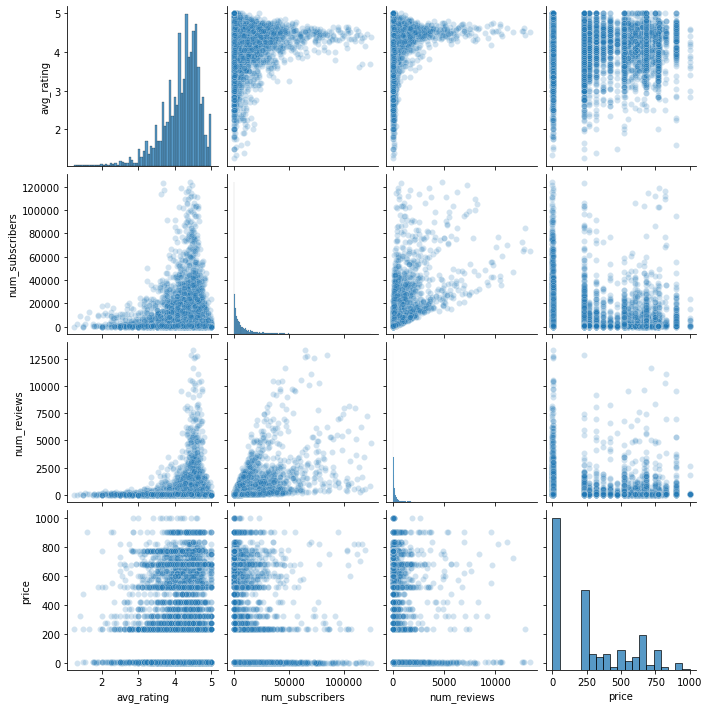

In [13]:
cols=['avg_rating','num_subscribers','published_since_month', 'num_reviews', 'price']
temp=df_courses[~df_courses.index.isin(excluded)]
sns.pairplot(temp[cols], plot_kws= {'alpha': 0.2})

The followings can be seen from the pairplot above:
- There is a positive correlation between the number of reviews/number of subscribers and the average rating - students normally give better ratings
- As expected, there is a positive correlation between number of subscribers and number of reviews
- There is also a positive correlation between published since and the average rating -> older courses have better ratings. This seems logic, since I would expect that courses which aren't popular won't stay long on the sortiment
- The price doesn't have an effect on the average ratings 

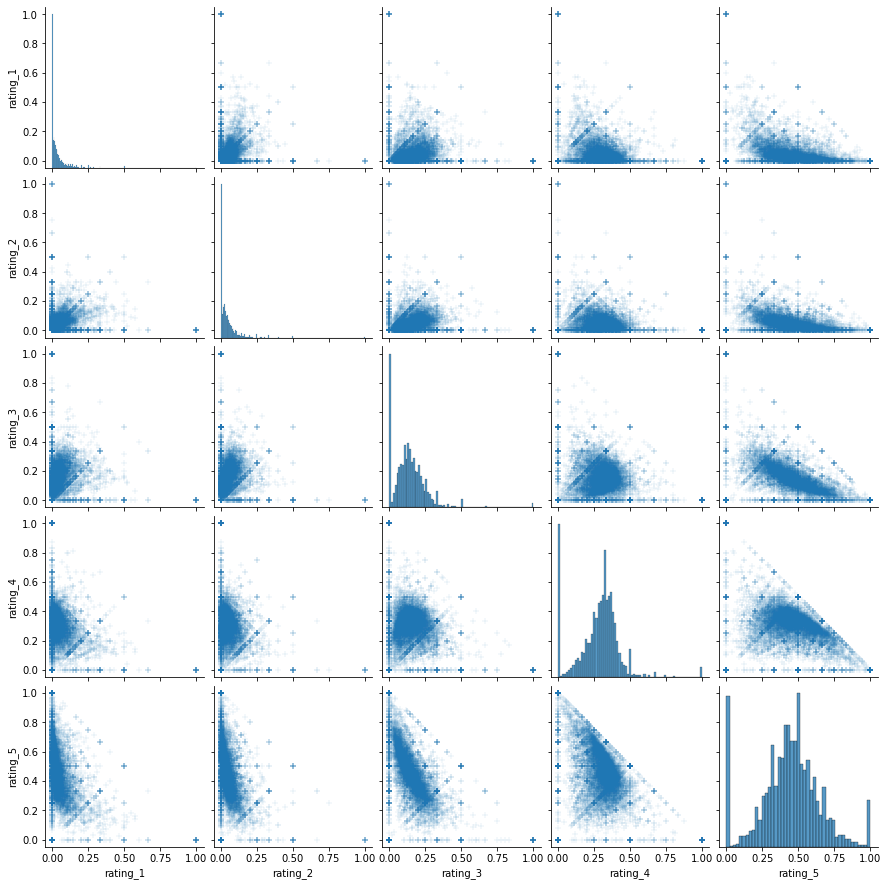

In [14]:
sns.pairplot(df_courses[['rating_1', 'rating_2', 'rating_3', 'rating_4', 'rating_5']], markers="+",  plot_kws= {'alpha': 0.2})

### 3.1.2. Discrete variables

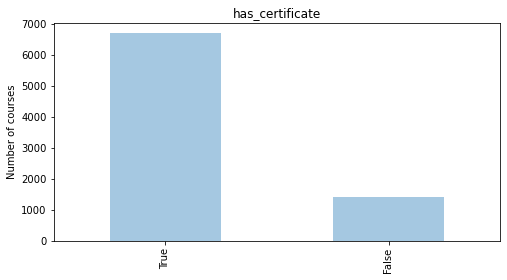

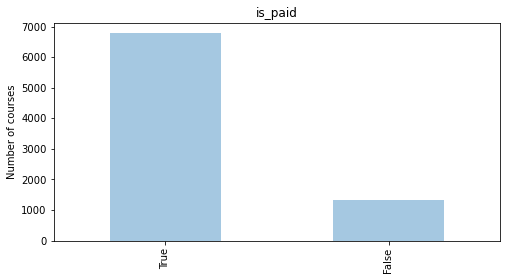

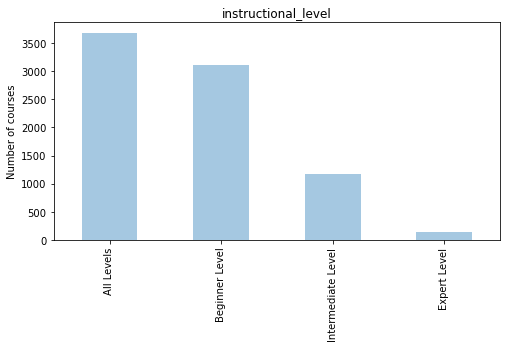

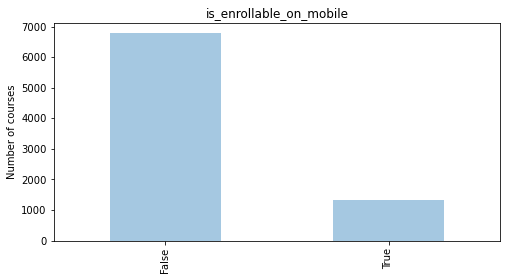

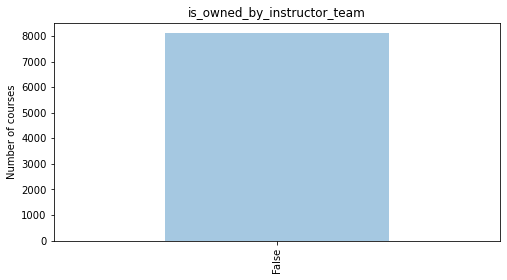

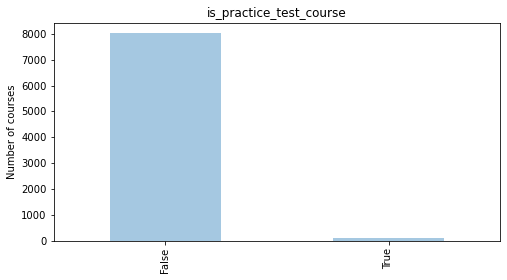

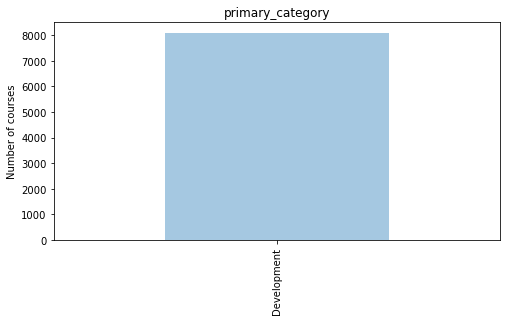

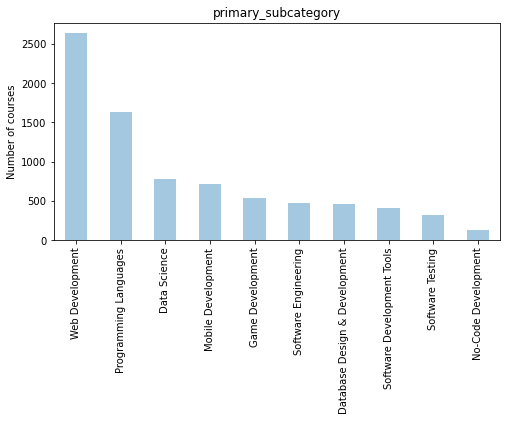

In [15]:
#barchart
var_char=['has_certificate', 'is_paid', 'instructional_level', 'is_enrollable_on_mobile','is_owned_by_instructor_team',
          'is_practice_test_course', 'primary_category', 'primary_subcategory' ]
for col in var_char:
    temp=df_courses[col].value_counts()
    x_labels=temp.index
    plt.figure(figsize=(8, 4))
    ax = temp.plot(kind='bar', alpha=0.4)
    ax.set_title(col)
    ax.set_ylabel('Number of courses')
    ax.set_xticklabels(x_labels)
  
    rects = ax.patches
    labels = list(temp.values/temp.values.sum()*100)
    labels=[str(round(l,0))+'%' for l in labels]
    #for rect, label in zip(rects, labels):
        #height = rect.get_height()
        #ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label, ha='center', va='bottom')
plt.show()

In [16]:
#number of subscribers in the categories
df_courses['earnings']=df_courses['price']*df_courses['num_subscribers']
df_subcategories=df_courses.groupby('primary_subcategory').agg({'num_subscribers':'sum',
                                               'avg_rating': 'mean',
                                               'price': 'mean',
                                               'earnings': 'sum'})    
df_subcategories

,num_subscribers,avg_rating,price,earnings
primary_subcategory,,,,
Data Science,8276767,3.977223,252.009540,1.567286e+09
Database Design & Development,3283376,4.046960,342.214534,9.189287e+08
Game Development,3627346,4.093856,257.109814,3.169105e+08
Mobile Development,6654599,3.985700,253.449043,7.358733e+08
No-Code Development,558348,3.887735,246.058387,8.978767e+07
Programming Languages,24378879,3.963976,292.053629,5.540346e+09
Software Development Tools,3106656,3.984969,280.969294,8.870538e+08
Software Engineering,2977025,4.034914,308.298718,6.382414e+08
Software Testing,2991180,4.110871,264.968865,4.646919e+08


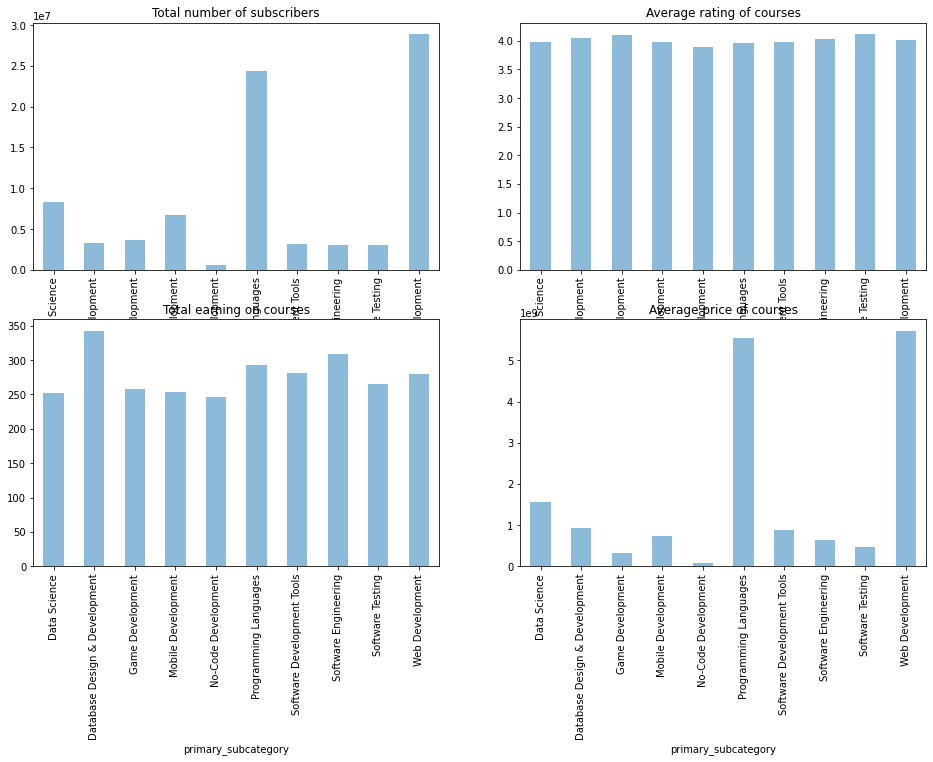

In [17]:
titles=['Total number of subscribers', 'Average rating of courses', 'Total earning on courses', 'Average price of courses']
fig, ax= plt.subplots(2,2,figsize=(16,10))
num=0
for i, col in enumerate(df_subcategories.columns):
    num+=1
    ax= plt.subplot(2,2, num)
    df_subcategories[col].plot(kind='bar', ax=ax, alpha=0.5)
    plt.title(titles[i])
    if num in range(3) :
        plt.tick_params(labelbottom='off')
plt.show()
    

- Two subcategories have an average price higher than 100 dollars : The subcategory Data & analytics with 112, and Project Management with 104
- The total earning on the courses is the highest in the subcategory for Data & Analytics and the second is in Entrepreneurship.
- The total number of subscribers are the highest in the category of Entrepreneurship and in Data & Analytics

### 3.1.3 Attribute Objectives

I will analyse the attribute objectives of the courses to get a better understanding about the courses. 
At first I needed to transform the list of objectives into one string, and then investigate the frequencies of each word.
I also implemented stemming: for that, I created a dataframe, where thee indexes are the stemmed words, and the values are the words which were stemmed. I needed it, to transform back the stemmed words. By means of the stemming similar words were counted as the same word (e.g. the words learn and learning are treated as one word). 

In [18]:
objectives_text=df_courses['objectives'].apply(udemy_functions.combine_list)
vocab_frame_orig=udemy_functions.vocab_stem(objectives_text)
vocab_frame_orig.head()

,words
the,the
25+,25+
guidelin,guidelines
of,of
amaz,amazing


In [19]:
#drop duplicates from the dataframe with stemmed words
vocab_frame=udemy_functions.drop_words(vocab_frame_orig)

In [20]:
StopWords=set(stopwords.words('english')+list(punctuation)+["’", "n't", "'s", "--", "-", "...", "``", "''", "“", "039"])

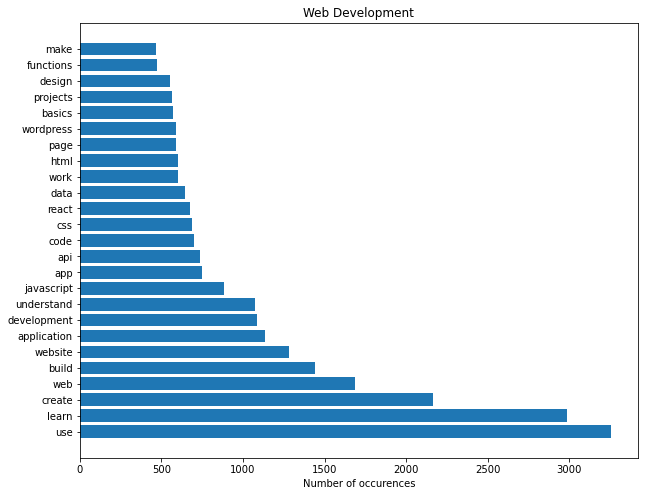

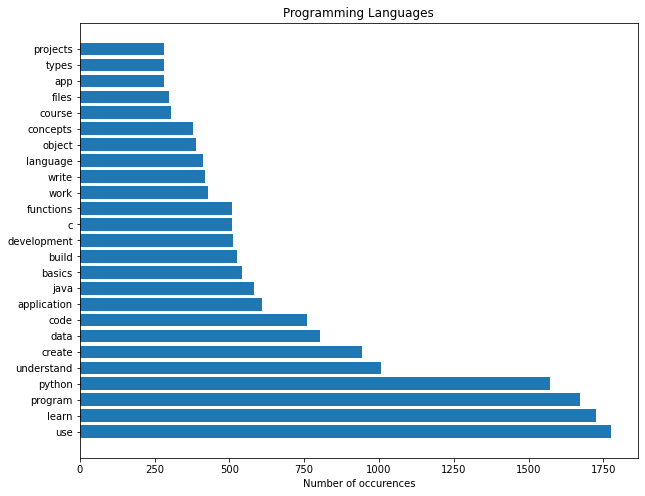

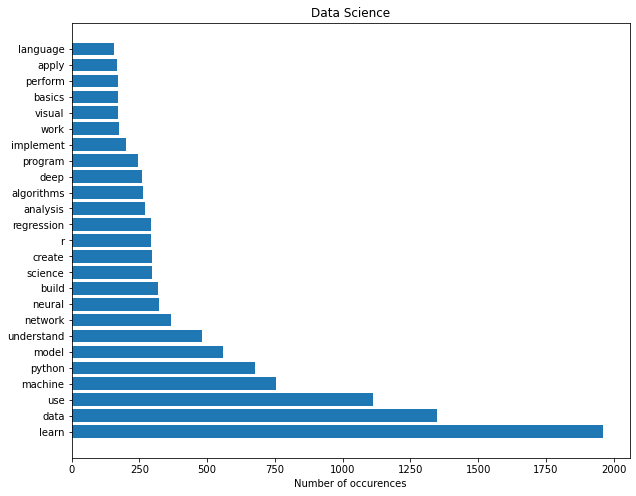

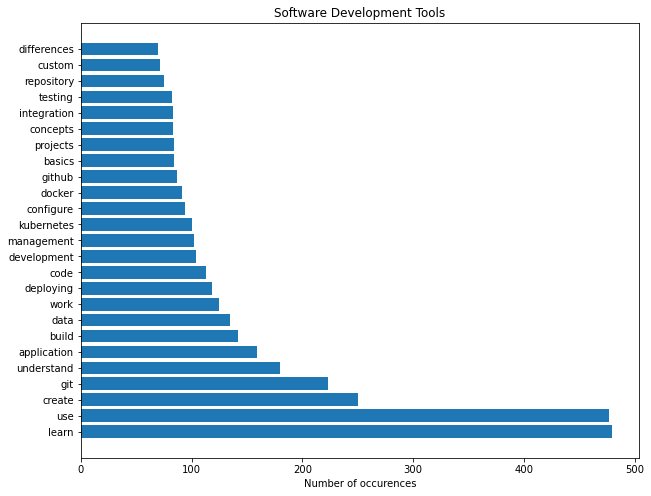

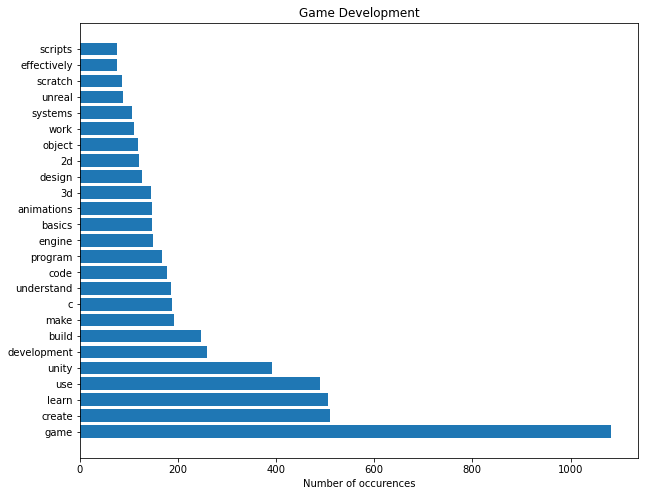

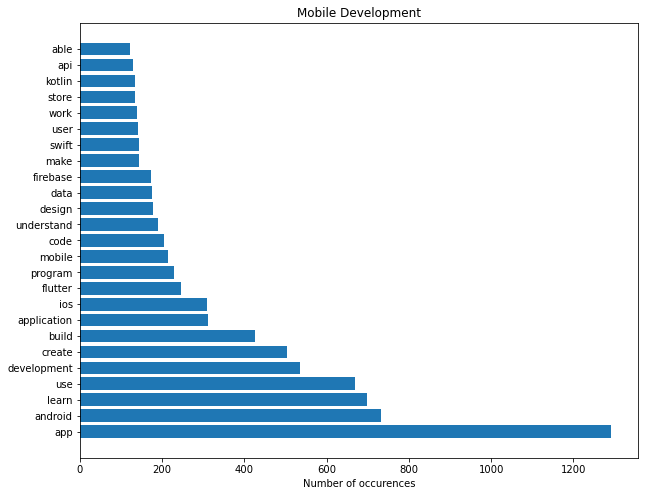

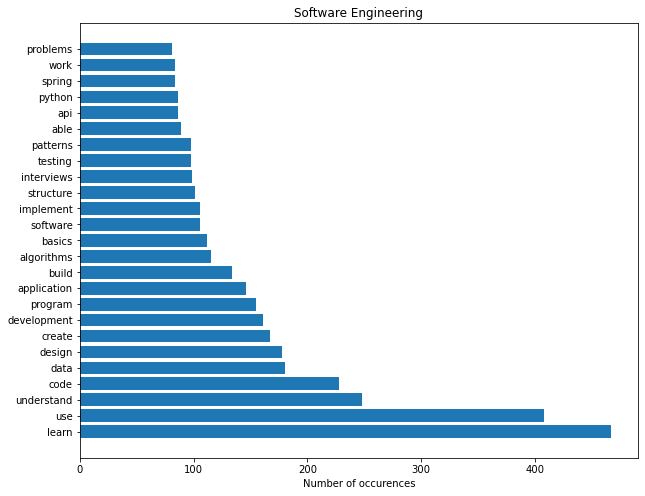

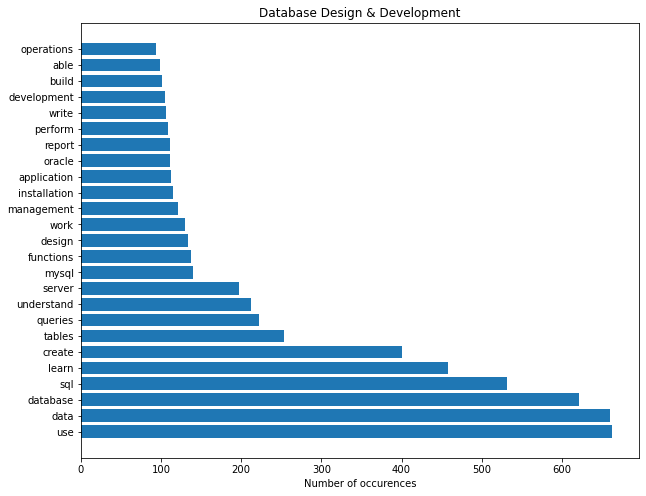

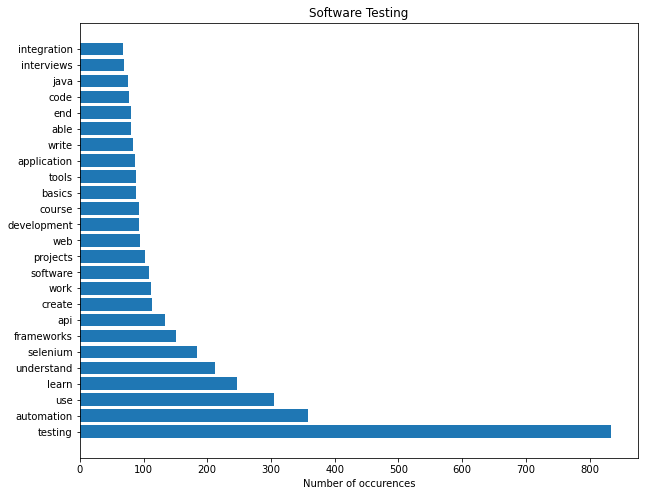

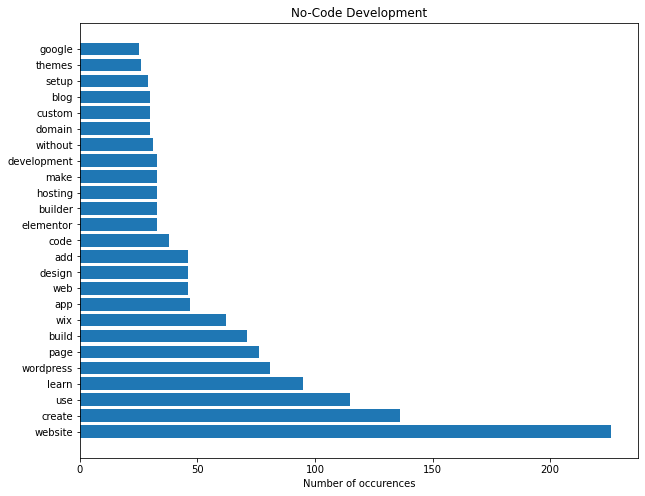

In [21]:
udemy_functions.top_words_graph(df_courses, 'objectives', True, 'bar', StopWords, vocab_frame)

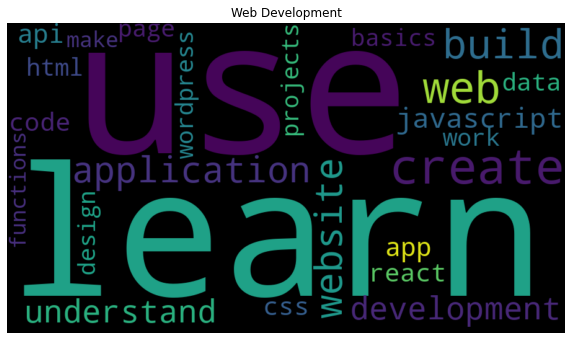

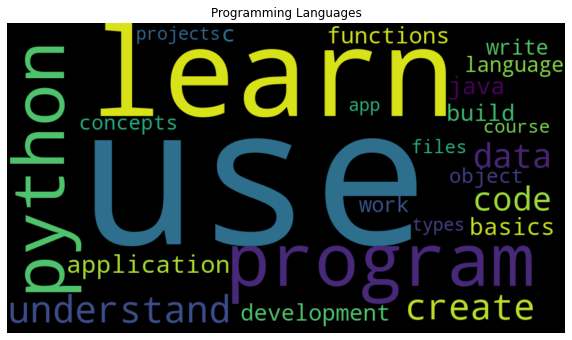

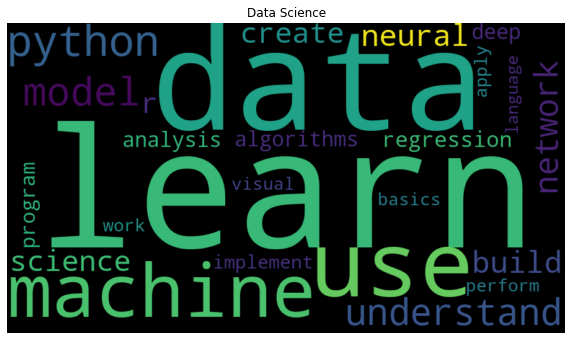

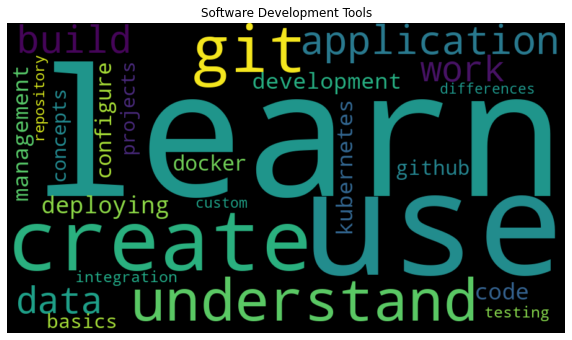

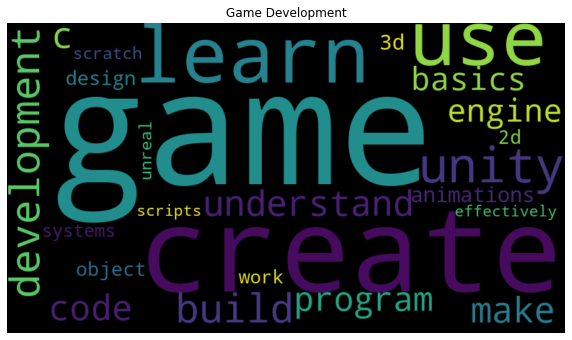

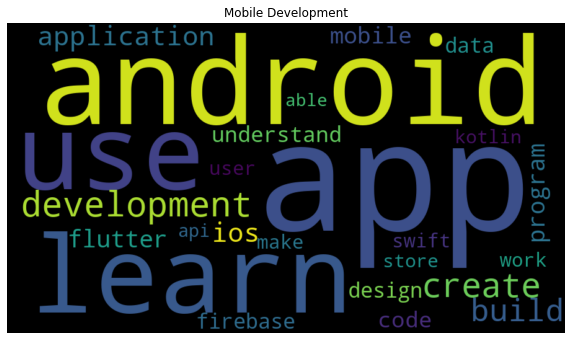

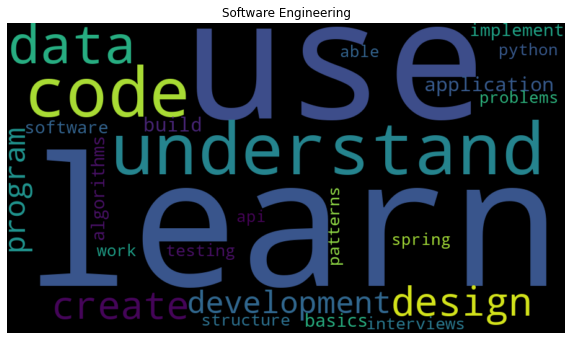

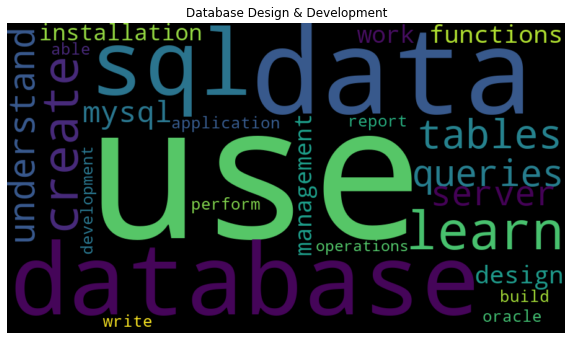

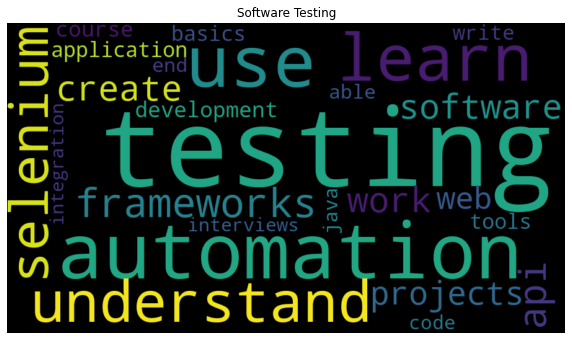

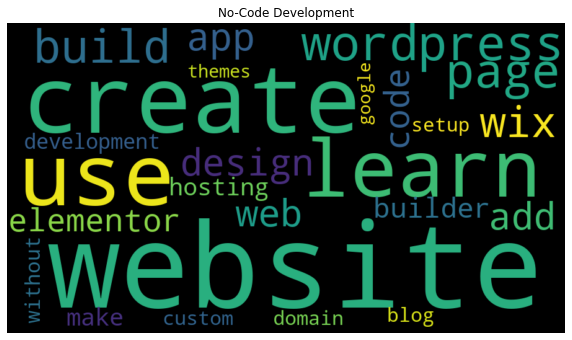

In [22]:
udemy_functions.top_words_graph(df_courses, 'objectives', True, 'wordcloud', StopWords, vocab_frame)

### 3.1.4. Attribute Description

In [ ]:
vocab_frame_descr=udemy_functions.vocab_stem(df_courses['description_text'])
vocab_frame_descr.head()

In [ ]:
vocab_frame_descr=udemy_functions.drop_words(vocab_frame_descr)

In [ ]:
udemy_functions.top_words_graph(df_courses, 'description_text', False, 'bar', StopWords, vocab_frame_descr)

In [ ]:
udemy_functions.top_words_graph(df_courses, 'description_text', False, 'wordcloud', StopWords, vocab_frame_descr)

## 3.2. EDA of the reviews dataset

In [ ]:
df_reviews=pd.read_csv('data/cleaned/df_reviews.csv', index_col=0)
df_reviews.head()

In [ ]:
# Number of reviews per course: most courses have very few reviews
# The limit of the available reviews from the API is 10.000 -> that's why there are couple courses around 10.000 
nr_reviews=df_reviews['course_id'].value_counts()
ax, fig= plt.subplots(figsize=(10,4))
plt.hist(nr_reviews, bins=30)
plt.xlabel('Number of reviews')
plt.ylabel('Number of courses')
plt.title('Number of reviews')
plt.show()

In [ ]:
nr_reviews.describe()

In [ ]:
#Number of reviews per user_name (User_name is not unique!)
nr_user=df_reviews['user_name'].value_counts()
unique, counts = np.unique(nr_user, return_counts=True)
#dict(zip(unique, counts))

In [ ]:
#plot the first 20 value of the most common number of reviews per user
#most users (more than 600000) have only 1 review
ax, fig= plt.subplots(figsize=(10,4))

plt.bar(np.arange(len(counts[:20])), counts[:20], align='center')
plt.xticks(np.arange(len(counts[:20])), unique[:20])
plt.xlabel('number of reviews per user')
plt.ylabel('number of users')
plt.title('Number of reviews per user')
plt.show()

In [ ]:
#plot the usernames with the most reviews (Username is not unique)
ax, fig= plt.subplots(figsize=(10,4))
nr_user[:20].plot(kind='bar', alpha=0.4)

In [ ]:
df_courses['objectives']

In [ ]:
df_courses['description_text']